In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

In [2]:
import sys
sys.path.append('..')
from helpers import try_load_dict

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica"
})

bigger_font_size=10
column_width = 3.375
double_stack=(column_width,column_width)
double_stack=(0.75*column_width,0.7*column_width)

red = plt.get_cmap("Reds")
blue = plt.get_cmap("Blues")
green = plt.get_cmap("Greens")

data_prepend = './'
data_prepend = 'public_data/'


# Ferromagnet

In [4]:
exp_name = 'Nov13'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

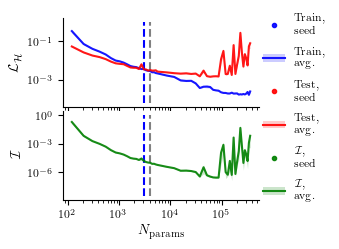

In [5]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)

seeds = np.arange(10,101,10)
show_seeds = False

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            depth,width = key
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax[0].scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax[0].scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax[0].fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax[0].errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax[0].fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)

ax[0].vlines(2**N,6*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,6*10**-5,10**0,linestyle='--',color='b',zorder=-1)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)
  

### Subplot 2

if show_seeds:
    for seed in seeds:
        path = f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            depth,width = key
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax[1].scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax[1].fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax[1].vlines(2**N,3*10**-9,10**0,linestyle='--',color='grey',zorder=-1)
ax[1].vlines(2**N*frac_train,3*10**-9,10**0,linestyle='--',color='b',zorder=-1)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)


plt.savefig(f'./figures/doubleDescent_probs_ferro.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

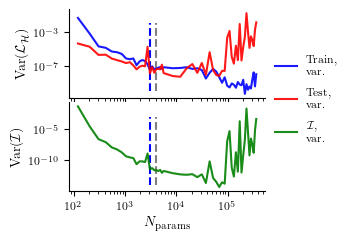

In [6]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)


path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax[0].errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')

ax[0].vlines(2**N,10**-10,10**-2,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,10**-10,10**-2,linestyle='--',color='b',zorder=-1)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$',fontsize=bigger_font_size)

### Subplot 2

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$')

ax[1].vlines(2**N,10**-14,10**-3,linestyle='--',color='grey',zorder=-2)
ax[1].vlines(2**N*frac_train,10**-14,10**-3,linestyle='--',color='b',zorder=-2)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.9,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_probs_ferro.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

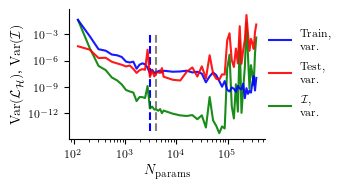

In [7]:
fig,ax = plt.subplots(1, 1, figsize=(0.75*column_width,0.5*column_width))
fig.subplots_adjust(hspace=0.05)

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax.errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax.errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')
ax.errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$',zorder=-1)

ax.vlines(2**N,10**-14,10**-3,linestyle='--',color='grey',zorder=-2)
ax.vlines(2**N*frac_train,10**-14,10**-3,linestyle='--',color='b',zorder=-2)

ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$, $\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax.set_xscale('log')
ax.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_probs_ferro_single.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Paramagnet

In [8]:
exp_name = 'Jul16'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

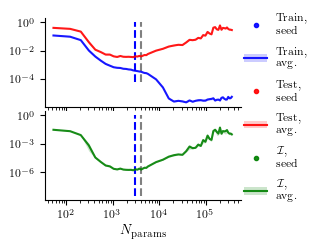

In [9]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)

seeds = np.arange(10,101,10)
show_seeds = False

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            depth,width = key
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax[0].scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax[0].scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax[0].fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax[0].errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax[0].fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)

ax[0].vlines(2**N,6*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,6*10**-5,10**0,linestyle='--',color='b',zorder=-1)

ax[0].set_yscale('log')
  

### Subplot 2

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            depth,width = key
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax[1].scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax[1].fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax[1].vlines(2**N,3*10**-9,10**0,linestyle='--',color='grey',zorder=-1)
ax[1].vlines(2**N*frac_train,3*10**-9,10**0,linestyle='--',color='b',zorder=-1)

ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)


plt.savefig(f'./figures/doubleDescent_probs_para.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

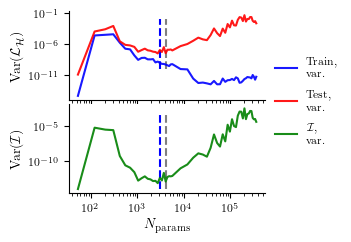

In [10]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=double_stack)
fig.subplots_adjust(hspace=0.05)


path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax[0].errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax[0].errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')

ax[0].vlines(2**N,10**-10,10**-2,linestyle='--',color='grey',zorder=-1)
ax[0].vlines(2**N*frac_train,10**-10,10**-2,linestyle='--',color='b',zorder=-1)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$',fontsize=bigger_font_size)

### Subplot 2

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax[1].errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$')

ax[1].vlines(2**N,10**-14,10**-3,linestyle='--',color='grey',zorder=-2)
ax[1].vlines(2**N*frac_train,10**-14,10**-3,linestyle='--',color='b',zorder=-2)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax[1].set_xscale('log')
ax[1].set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.9,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_probs_para.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

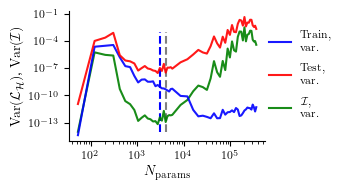

In [11]:
fig,ax = plt.subplots(1, 1, figsize=(0.75*column_width,0.5*column_width))
fig.subplots_adjust(hspace=0.05)

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax.errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax.errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')
ax.errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$',zorder=-1)

ax.vlines(2**N,10**-14,10**-3,linestyle='--',color='grey',zorder=-2)
ax.vlines(2**N*frac_train,10**-14,10**-3,linestyle='--',color='b',zorder=-2)

ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$, $\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax.set_xscale('log')
ax.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_probs_para_single.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Ferro and Para

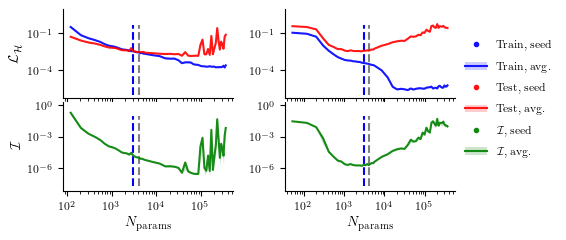

In [12]:
fig,ax = plt.subplots(2, 2, sharex='col', figsize=(1.5*column_width,0.7*column_width))
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.3)
ax0 = ax[0,0]
ax1 = ax[1,0]
ax2 = ax[0,1]
ax3 = ax[1,1]

seeds = np.arange(10,101,10)
show_seeds = False

# Ferromagnetic Phase ####################################################
exp_name = 'Nov13'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            depth,width = key
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax0.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax0.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax0.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax0.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax0.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax0.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)
  
if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            depth,width = key
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax1.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax1.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax1.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax0.vlines(2**N,8*10**-7,5*10**-1,linestyle='--',color='grey',zorder=-1)
ax0.vlines(2**N*frac_train,8*10**-7,5*10**-1,linestyle='--',color='b',zorder=-1)

ax1.vlines(2**N,2*10**-8,10**-1,linestyle='--',color='grey',zorder=-1)
ax1.vlines(2**N*frac_train,2*10**-8,10**-1,linestyle='--',color='b',zorder=-1)

######################################################################


# Paramagnetic Phase ####################################################
exp_name = 'Jul16'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax2.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax2.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax2.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax2.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax2.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax2.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)
  
if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax3.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax3.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax3.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax2.vlines(2**N,8*10**-7,5*10**-1,linestyle='--',color='grey',zorder=-1)
ax2.vlines(2**N*frac_train,8*10**-7,5*10**-1,linestyle='--',color='b',zorder=-1)

ax3.vlines(2**N,2*10**-8,10**-1,linestyle='--',color='grey',zorder=-1)
ax3.vlines(2**N*frac_train,2*10**-8,10**-1,linestyle='--',color='b',zorder=-1)

######################################################################

ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax0.set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)
ax1.set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax1.set_xscale('log')
ax1.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax3.set_xscale('log')
ax3.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax0.set_ylim(5*10**-7,10**1)
ax2.set_ylim(5*10**-7,10**1)
ax1.set_ylim(6*10**-9,2*10**0)
ax3.set_ylim(6*10**-9,2*10**0)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()
          ]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.9,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_probs_para_ferro.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


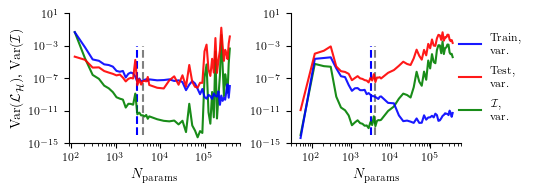

In [13]:
fig,ax = plt.subplots(1, 2, sharex='col', figsize=(1.5*column_width,0.5*column_width))
fig.subplots_adjust(wspace=0.3)
ax0 = ax[0]
ax1 = ax[1]

seeds = np.arange(10,101,10)
show_seeds = True

# 75:25 splitting ####################################################
exp_name = 'Nov13'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

path = data_prepend + f'{exp_name}/IsingChain_h-0.5_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax0.errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax0.errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')
ax0.errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$',zorder=-1)

######################################################################


# 25:75 splitting ####################################################
exp_name = 'Jul16'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

path = data_prepend + f'{exp_name}/IsingChain_h-5.0_N12/TestTrain/testSize{frac_test}_probs/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax1.errorbar(x,train_var/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9,label=r'$\mathrm{Train}$')
ax1.errorbar(x,test_var/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9,label=r'$\mathrm{Test}$')
ax1.errorbar(x,fidelities_var,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9,label=r'$\mathcal{I}$',zorder=-1)


######################################################################

ax0.set_yscale('log')
ax1.set_yscale('log')
ax0.set_ylabel(r'$\mathrm{Var}(\mathcal{L}_\mathcal{H})$, $\mathrm{Var}(\mathcal{I})$',fontsize=bigger_font_size)

ax0.set_xscale('log')
ax0.set_xlim(9*10**1,6*10**5)
ax0.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax1.set_xscale('log')
ax1.set_xlim(3*10**1,6*10**5)
ax1.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax0.set_ylim(10**-15,10**1)
ax0.vlines(2**N,10**-14,10**-3,linestyle='--',color='grey',zorder=-2)
ax0.vlines(2**N*frac_train,10**-14,10**-3,linestyle='--',color='b',zorder=-2)

ax1.set_ylim(10**-15,10**1)
ax1.vlines(2**N,10**-14,10**-3,linestyle='--',color='grey',zorder=-2)
ax1.vlines(2**N*frac_train,10**-14,10**-3,linestyle='--',color='b',zorder=-2)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{var.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{var.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$'+'\n'+r'$\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{var.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$'+'\n'+r'$\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_line,
    test_line,
    line]
labels = [train_line.get_label(),
          test_line.get_label(),
          line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_vars_probs_para_ferro.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()